# Faces Dataset Decomposition

This notebook is based on [Faces dataset decomposition](http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py) example from scikit-learn website

In [41]:
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [91]:
IMAGE_SHAPE = (64, 64)
N_ROWS = 4
N_COLS = 6
N_COMPONENTS = N_ROWS * N_COLS
RANDOM_STATE = 42

In [87]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=RANDOM_STATE)
faces = dataset.data

In [92]:
def plot_gallery(title, images, n_row=N_ROWS, n_col=N_COLS):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)

    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(IMAGE_SHAPE), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

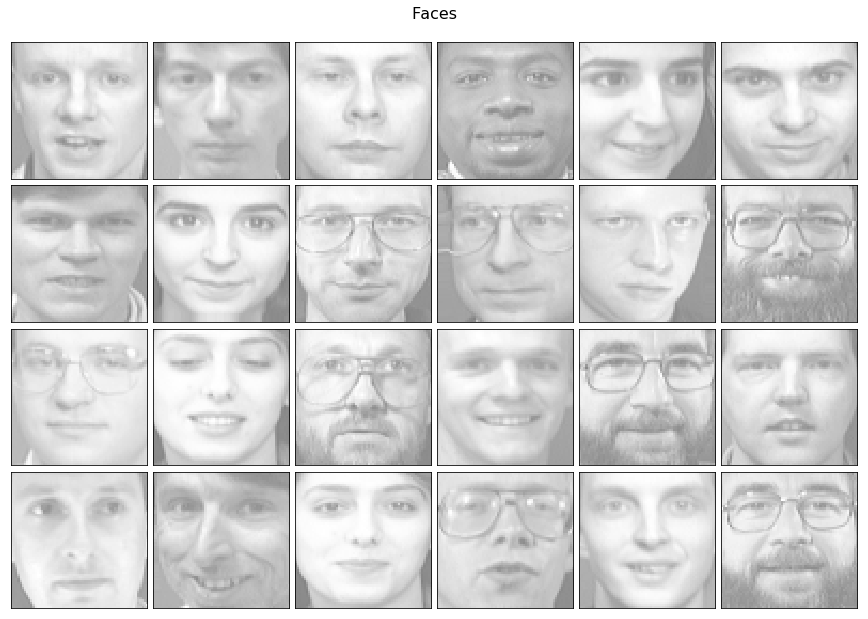

In [93]:
plot_gallery("Faces", faces[:N_COMPONENTS])

In [94]:
pca = PCA(n_components=N_COMPONENTS, svd_solver='randomized', whiten=True)
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

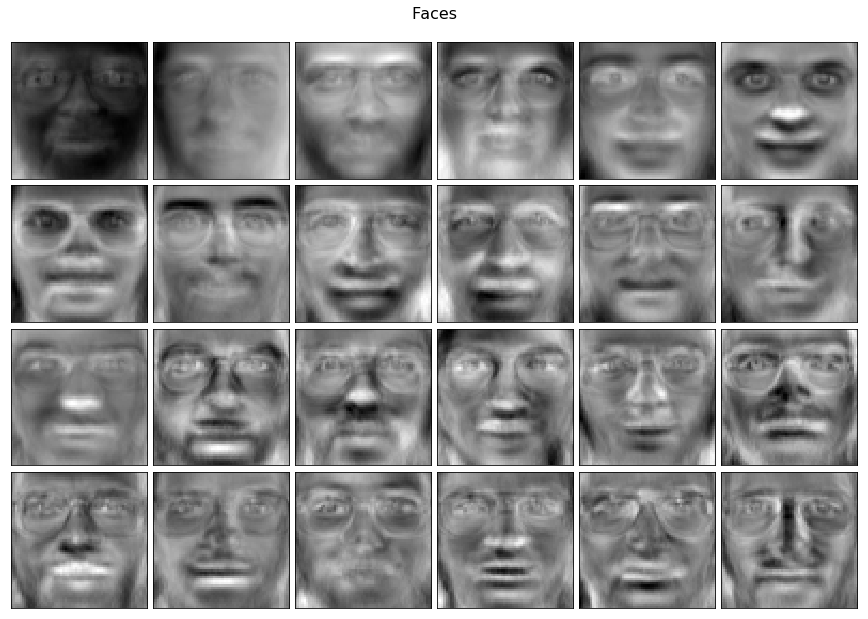

In [95]:
plot_gallery("Faces", pca.components_)